In [3]:
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem
from rdkit.Chem import rdMolDescriptors as rdmd
from rdkit.Chem.Scaffolds import MurckoScaffold
import pandas as pd
from tqdm import tqdm
import time
import numpy as np
from scipy.spatial.distance import cdist
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef,confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns

import numpy as np #
import pandas as pd 
import string
import json
#from patsy import dmatrices
from operator import itemgetter
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.metrics import classification_report

In [4]:
not_to_be_selected_list=[
       'Activity Summary', 'Viability Activity', 'PUBCHEM_ACTIVITY_SCORE',
       'Viability Potency (uM)', 'Viability Efficacy (%)', "index",
                         "Nuclei_Correlation_Manders_AGP_DNA",
            "Nuclei_Correlation_Manders_AGP_ER",
            "Nuclei_Correlation_Manders_AGP_Mito",
            "Nuclei_Correlation_Manders_AGP_RNA",
            "Nuclei_Correlation_Manders_DNA_AGP",
            "Nuclei_Correlation_Manders_DNA_ER",
            "Nuclei_Correlation_Manders_DNA_Mito",
            "Nuclei_Correlation_Manders_DNA_RNA",
            "Nuclei_Correlation_Manders_ER_AGP",
            "Nuclei_Correlation_Manders_ER_DNA",
            "Nuclei_Correlation_Manders_ER_Mito",
            "Nuclei_Correlation_Manders_ER_RNA",
            "Nuclei_Correlation_Manders_Mito_AGP",
            "Nuclei_Correlation_Manders_Mito_DNA",
            "Nuclei_Correlation_Manders_Mito_ER",
            "Nuclei_Correlation_Manders_Mito_RNA",
            "Nuclei_Correlation_Manders_RNA_AGP",
            "Nuclei_Correlation_Manders_RNA_DNA",
            "Nuclei_Correlation_Manders_RNA_ER",
            "Nuclei_Correlation_Manders_RNA_Mito",
            "Nuclei_Correlation_RWC_AGP_DNA",
            "Nuclei_Correlation_RWC_AGP_ER",
            "Nuclei_Correlation_RWC_AGP_Mito",
            "Nuclei_Correlation_RWC_AGP_RNA",
            "Nuclei_Correlation_RWC_DNA_AGP",
            "Nuclei_Correlation_RWC_DNA_ER",
            "Nuclei_Correlation_RWC_DNA_Mito",
            "Nuclei_Correlation_RWC_DNA_RNA",
            "Nuclei_Correlation_RWC_ER_AGP",
            "Nuclei_Correlation_RWC_ER_DNA",
            "Nuclei_Correlation_RWC_ER_Mito",
            "Nuclei_Correlation_RWC_ER_RNA",
            "Nuclei_Correlation_RWC_Mito_AGP",
            "Nuclei_Correlation_RWC_Mito_DNA",
            "Nuclei_Correlation_RWC_Mito_ER",
            "Nuclei_Correlation_RWC_Mito_RNA",
            "Nuclei_Correlation_RWC_RNA_AGP",
            "Nuclei_Correlation_RWC_RNA_DNA",
            "Nuclei_Correlation_RWC_RNA_ER",
            "Nuclei_Correlation_RWC_RNA_Mito",
            "Nuclei_Granularity_14_AGP",
            "Nuclei_Granularity_14_DNA",
            "Nuclei_Granularity_14_ER",
            "Nuclei_Granularity_14_Mito",
            "Nuclei_Granularity_14_RNA",
            "Nuclei_Granularity_15_AGP",
            "Nuclei_Granularity_15_DNA",
            "Nuclei_Granularity_15_ER",
            "Nuclei_Granularity_15_Mito",
            "Nuclei_Granularity_15_RNA",
            "Nuclei_Granularity_16_AGP",
            "Nuclei_Granularity_16_DNA",
            "Nuclei_Granularity_16_ER",
            "Nuclei_Granularity_16_Mito",
            "Nuclei_Granularity_16_RNA"]

In [5]:
info= [    "InChICode_standardised",
    "Cells_Number_Object_Number",
    "StdInChI",
    "PUBCHEM_ACTIVITY_OUTCOME"]

CP_features_list= [                                 
 'Cells_Granularity_10_RNA',
 'Cytoplasm_AreaShape_FormFactor',
 'Cytoplasm_Correlation_K_Mito_RNA',
 'Nuclei_AreaShape_Zernike_7_1',
 'Cytoplasm_Granularity_1_RNA',
 'Nuclei_AreaShape_Zernike_7_3',
 'Nuclei_Correlation_Costes_DNA_AGP',
 'Cells_Granularity_1_RNA',
 'Cells_Granularity_1_AGP',
 'Nuclei_Intensity_LowerQuartileIntensity_ER',
 'Cells_Granularity_14_RNA',
 'Cytoplasm_Correlation_K_DNA_ER',
 'Cells_Intensity_MedianIntensity_ER',
 'Nuclei_Intensity_IntegratedIntensityEdge_RNA',
 'Cells_Intensity_StdIntensityEdge_RNA',
 'Cytoplasm_Intensity_IntegratedIntensityEdge_ER',
 'Cytoplasm_Correlation_RWC_RNA_Mito',
 'Cells_Correlation_RWC_Mito_RNA',
 'Nuclei_AreaShape_Zernike_5_1',
 'Nuclei_Granularity_1_ER',
 'Cytoplasm_RadialDistribution_MeanFrac_RNA_4of4',
 'Nuclei_RadialDistribution_RadialCV_RNA_4of4',
 'Cells_Intensity_IntegratedIntensityEdge_AGP',
 'Cytoplasm_AreaShape_Zernike_6_6',
 'Cytoplasm_Granularity_8_Mito',
 'Nuclei_Correlation_Correlation_Mito_ER',
 'Nuclei_Intensity_MassDisplacement_AGP',
 'Cytoplasm_Granularity_14_RNA',
 'Nuclei_RadialDistribution_FracAtD_DNA_3of4',
 'Cells_Correlation_RWC_AGP_DNA',
 'Cells_Granularity_12_RNA',
 'Nuclei_Granularity_11_RNA',
 'Cells_Granularity_11_AGP',
 'Nuclei_RadialDistribution_FracAtD_Mito_2of4',
 'Cytoplasm_Granularity_8_ER',
 'Nuclei_Intensity_MaxIntensity_AGP',
 'Cytoplasm_Correlation_RWC_DNA_Mito',
 'Cells_Granularity_8_ER',
 'Nuclei_Granularity_10_RNA',
 'Nuclei_Granularity_1_RNA',
 'Cells_Correlation_RWC_RNA_Mito',
 'Nuclei_Neighbors_AngleBetweenNeighbors_1',
 'Cells_Granularity_1_ER',
 'Cytoplasm_Correlation_RWC_Mito_RNA',
 'Cytoplasm_Correlation_K_DNA_RNA',
 'Nuclei_Granularity_10_ER',
 'Nuclei_Granularity_11_AGP',
 'Cells_Granularity_1_Mito',
 'Nuclei_Granularity_8_ER',
 'Cytoplasm_Granularity_1_ER',
 'Nuclei_Correlation_Costes_ER_AGP',
 'Nuclei_Texture_Variance_AGP_5_0',
 'Cytoplasm_Correlation_Costes_RNA_ER',
 'Cells_RadialDistribution_RadialCV_DNA_4of4',
 'Cytoplasm_Correlation_Costes_DNA_Mito',
 'Cytoplasm_Correlation_K_DNA_AGP',
 'Cells_Correlation_K_DNA_ER',
 'Cells_Granularity_10_ER',
 'Cells_Granularity_8_RNA',
 'Nuclei_Granularity_8_RNA',
 'Cytoplasm_AreaShape_Zernike_8_0',
 'Cytoplasm_Granularity_11_RNA',
 'Cells_Texture_DifferenceVariance_RNA_10_0',
 'Cytoplasm_Granularity_10_ER',
 'Cells_Granularity_11_RNA',
 'Cytoplasm_RadialDistribution_MeanFrac_RNA_2of4',
 'Cells_Granularity_12_AGP',
 'Cytoplasm_Granularity_1_AGP',
 'Cytoplasm_AreaShape_Zernike_6_4',
 'Nuclei_Granularity_13_DNA',
 'Nuclei_AreaShape_Zernike_3_3',
 'Cytoplasm_Granularity_1_Mito',
 'Nuclei_Texture_Variance_Mito_10_0',
 'Cytoplasm_Granularity_8_RNA',
 'Cells_AreaShape_Zernike_5_1',
 'Cells_Intensity_MADIntensity_Mito',
 'Nuclei_Correlation_Costes_DNA_RNA',
 'Cells_Correlation_Costes_RNA_ER',
 'Nuclei_Granularity_7_ER',
 'Cytoplasm_Correlation_RWC_Mito_DNA',
 'Nuclei_Intensity_MedianIntensity_DNA',
 'Cytoplasm_Intensity_MedianIntensity_ER',
 'Cells_Correlation_K_AGP_DNA',
 'Cells_RadialDistribution_RadialCV_RNA_4of4',
 'Nuclei_RadialDistribution_FracAtD_Mito_1of4',
 'Nuclei_Intensity_MaxIntensityEdge_AGP',
 'Cells_RadialDistribution_RadialCV_Mito_4of4',
 'Cells_Correlation_RWC_DNA_Mito',
 'Nuclei_Intensity_MedianIntensity_ER',
 'Nuclei_Correlation_K_ER_DNA',
 'Nuclei_Granularity_1_Mito',
 'Cells_Intensity_LowerQuartileIntensity_ER',
 'Nuclei_AreaShape_Zernike_3_1',
 'Cytoplasm_Granularity_16_ER',
 'Cells_Intensity_IntegratedIntensityEdge_ER',
 'Nuclei_Correlation_K_DNA_ER',
 'Nuclei_Granularity_1_AGP',
 'Nuclei_Intensity_UpperQuartileIntensity_ER',
 'Cells_Texture_InfoMeas2_DNA_5_0',
 'Nuclei_Granularity_12_RNA',
 'Nuclei_Granularity_1_DNA',
 'Cytoplasm_Intensity_IntegratedIntensityEdge_RNA',
 'Cytoplasm_Granularity_10_RNA',
 'Cells_Texture_AngularSecondMoment_AGP_10_0',
 'Cytoplasm_Correlation_K_AGP_DNA',
 'Cells_Correlation_Costes_DNA_AGP',
 'Nuclei_AreaShape_Zernike_1_1',
 'Nuclei_Intensity_MinIntensityEdge_ER',
 'Nuclei_Intensity_MinIntensity_ER',
 'Cytoplasm_RadialDistribution_RadialCV_AGP_2of4']
    
    
GO_features_list=[  'chloride transmembrane transport (GO:1902476)',
 'cytoplasmic sequestering of protein (GO:0051220)',
 'protein-DNA complex subunit organization (GO:0071824)',
 'response to endoplasmic reticulum stress (GO:0034976)',
 'toll-like receptor 9 signaling pathway (GO:0034162)',
 'signal sequence binding (GO:0005048)',
 'NAD-dependent histone deacetylase activity (H3-K18 specific) (GO:0097372)',
 'cellular response to corticosteroid stimulus (GO:0071384)',
 'positive regulation of protein serine/threonine kinase activity (GO:0071902)',
 'insulin receptor substrate binding (GO:0043560)',
 'early endosome (GO:0005769)',
 'maintenance of protein location in cell (GO:0032507)',
 'actin filament bundle organization (GO:0061572)',
 'negative regulation of glucose transport (GO:0010829)',
 'cortical actin cytoskeleton (GO:0030864)',
 'repressing transcription factor binding (GO:0070491)',
 'negative regulation of glucose import (GO:0046325)',
 'intrinsic apoptotic signaling pathway in response to endoplasmic reticulum stress (GO:0070059)',
 'ER-nucleus signaling pathway (GO:0006984)',
 'maintenance of location in cell (GO:0051651)',
 'fibril (GO:0043205)',
 'histone deacetylase activity (H3-K14 specific) (GO:0031078)',
 'lateral ventricle development (GO:0021670)',
 'photoreceptor outer segment membrane (GO:0042622)',
 'regulated secretory pathway (GO:0045055)',
 'negative regulation of mesenchymal cell apoptotic process (GO:2001054)',
 'negative regulation of cellular carbohydrate metabolic process (GO:0010677)',
 'digestive system process (GO:0022600)',
 'regulation of oxidative stress-induced neuron death (GO:1903203)',
 'kidney mesenchyme development (GO:0072074)',
 'tRNA aminoacylation (GO:0043039)',
 'cochlea morphogenesis (GO:0090103)',
 'positive regulation of cysteine-type endopeptidase activity (GO:2001056)',
 'regulation of cellular component size (GO:0032535)',
 'cellular response to leptin stimulus (GO:0044320)',
 'cytokine receptor activity (GO:0004896)',
 'NAD-dependent histone deacetylase activity (H3-K14 specific) (GO:0032041)',
 'toll-like receptor 5 signaling pathway (GO:0034146)',
 'mitotic DNA integrity checkpoint (GO:0044774)',
 'regulation of cell shape (GO:0008360)',
 'cellular response to dexamethasone stimulus (GO:0071549)',
 'embryonic viscerocranium morphogenesis (GO:0048703)',
 'cytoplasmic sequestering of transcription factor (GO:0042994)',
 'cellular response to steroid hormone stimulus (GO:0071383)',
 'lipopolysaccharide binding (GO:0001530)',
 'lysosome (GO:0005764)',
 'glutathione peroxidase activity (GO:0004602)',
 'alpha-amino-3-hydroxy-5-methyl-4-isoxazolepropionic acid selective glutamate receptor complex (GO:0032281)',
 'metanephric mesenchyme development (GO:0072075)',
 'inactivation of MAPK activity (GO:0000188)',
 'regulation of T cell apoptotic process (GO:0070232)',
 'nucleosome binding (GO:0031491)',
 'epithelial cell differentiation involved in kidney development (GO:0035850)',
 'RNA polymerase II core promoter proximal region sequence-specific DNA binding transcription factor activity involved in negative regulation of transcription (GO:0001078)',
 'skeletal muscle organ development (GO:0060538)',
 'histone deacetylase activity (H4-K16 specific) (GO:0034739)',
 'histone H3-K9 demethylation (GO:0033169)',
 'cellular response to unfolded protein (GO:0034620)',
 'photoreceptor cell differentiation (GO:0046530)',
 'activation of signaling protein activity involved in unfolded protein response (GO:0006987)',
 'anion:anion antiporter activity (GO:0015301)',
 'cellular response to glucocorticoid stimulus (GO:0071385)',
 'regulation of kidney development (GO:0090183)',
 'protein deacetylase activity (GO:0033558)',
 'positive regulation of cartilage development (GO:0061036)',
 'positive regulation of growth hormone secretion (GO:0060124)',
 'structure-specific DNA binding (GO:0043566)',
 'NAD-dependent histone deacetylase activity (H3-K9 specific) (GO:0046969)',
 'regulation of phosphatidylinositol 3-kinase signaling (GO:0014066)',
 'purinergic receptor activity (GO:0035586)',
 'developmental pigmentation (GO:0048066)',
 'cadherin binding (GO:0045296)',
 'positive regulation of endopeptidase activity (GO:0010950)',
 'lytic vacuole (GO:0000323)',
 'nucleosomal DNA binding (GO:0031492)',
 'pyrimidine nucleotide metabolic process (GO:0006220)',
 'WW domain binding (GO:0050699)',
 'toll-like receptor 10 signaling pathway (GO:0034166)',
 'positive regulation of cytokine production involved in immune response (GO:0002720)',
 'vacuole (GO:0005773)',
 'polypeptide N-acetylgalactosaminyltransferase activity (GO:0004653)',
 'positive regulation of kidney development (GO:0090184)',
 'selenium binding (GO:0008430)',
 'eye photoreceptor cell differentiation (GO:0001754)',
 'positive regulation of leukocyte degranulation (GO:0043302)',
 'tRNA binding (GO:0000049)',
 'cardiac muscle cell action potential involved in contraction (GO:0086002)',
 'negative regulation of carbohydrate metabolic process (GO:0045912)',
 'R-SMAD binding (GO:0070412)',
 'valine metabolic process (GO:0006573)',
 'respiratory chain complex IV assembly (GO:0008535)',
 'negative regulation of TOR signaling (GO:0032007)',
 'histone-serine phosphorylation (GO:0035404)',
 'phosphatidylinositol phospholipase C activity (GO:0004435)',
 'side of membrane (GO:0098552)',
 'endoplasmic reticulum unfolded protein response (GO:0030968)',
 'microtubule depolymerization (GO:0007019)',
 'mast cell activation (GO:0045576)',
 'MAP kinase phosphatase activity (GO:0033549)',
 'transcription from RNA polymerase II promoter (GO:0006366)',
 'histone deacetylase activity (H3-K9 specific) (GO:0032129)',
 'ESC/E(Z) complex (GO:0035098)'
]

In [6]:
for i in CP_features_list:
    print(i)

Cells_Granularity_10_RNA
Cytoplasm_AreaShape_FormFactor
Cytoplasm_Correlation_K_Mito_RNA
Nuclei_AreaShape_Zernike_7_1
Cytoplasm_Granularity_1_RNA
Nuclei_AreaShape_Zernike_7_3
Nuclei_Correlation_Costes_DNA_AGP
Cells_Granularity_1_RNA
Cells_Granularity_1_AGP
Nuclei_Intensity_LowerQuartileIntensity_ER
Cells_Granularity_14_RNA
Cytoplasm_Correlation_K_DNA_ER
Cells_Intensity_MedianIntensity_ER
Nuclei_Intensity_IntegratedIntensityEdge_RNA
Cells_Intensity_StdIntensityEdge_RNA
Cytoplasm_Intensity_IntegratedIntensityEdge_ER
Cytoplasm_Correlation_RWC_RNA_Mito
Cells_Correlation_RWC_Mito_RNA
Nuclei_AreaShape_Zernike_5_1
Nuclei_Granularity_1_ER
Cytoplasm_RadialDistribution_MeanFrac_RNA_4of4
Nuclei_RadialDistribution_RadialCV_RNA_4of4
Cells_Intensity_IntegratedIntensityEdge_AGP
Cytoplasm_AreaShape_Zernike_6_6
Cytoplasm_Granularity_8_Mito
Nuclei_Correlation_Correlation_Mito_ER
Nuclei_Intensity_MassDisplacement_AGP
Cytoplasm_Granularity_14_RNA
Nuclei_RadialDistribution_FracAtD_DNA_3of4
Cells_Correlatio

In [7]:
selected_list = info + CP_features_list + GO_features_list

In [8]:
df =pd.read_csv("GO_CP_MitoOverlap_nocelldeath.csv" ,  usecols=lambda x: x in selected_list)
df =df[df.PUBCHEM_ACTIVITY_OUTCOME != "Inconclusive"]
#df = df.replace({'PUBCHEM_ACTIVITY_OUTCOME': {"Active": 1, "Inactive": 0}})
df

,StdInChI,PUBCHEM_ACTIVITY_OUTCOME,Cells_AreaShape_Zernike_5_1,Cells_Correlation_Costes_DNA_AGP,Cells_Correlation_Costes_RNA_ER,Cells_Correlation_K_AGP_DNA,Cells_Correlation_K_DNA_ER,Cells_Correlation_RWC_AGP_DNA,Cells_Correlation_RWC_DNA_Mito,Cells_Correlation_RWC_Mito_RNA,...,negative regulation of carbohydrate metabolic process (GO:0045912),positive regulation of cartilage development (GO:0061036),inactivation of MAPK activity (GO:0000188),microtubule depolymerization (GO:0007019),NAD-dependent histone deacetylase activity (H3-K9 specific) (GO:0046969),negative regulation of cellular carbohydrate metabolic process (GO:0010677),endoplasmic reticulum unfolded protein response (GO:0030968),R-SMAD binding (GO:0070412),cochlea morphogenesis (GO:0090103),regulation of kidney development (GO:0090183)
0,InChI=1S/C10H10N2O/c1-8-7-10(13)12(11-8)9-5-3-...,1,-0.000138,0.008443,0.000160,-0.001732,-0.006329,-0.012966,0.002119,-0.000497,...,2.1964,0.5880,4.6206,0.0822,0.0055,2.5247,0.8347,2.7623,0.9106,2.5061
1,"InChI=1S/C10H10N4O2S/c11-8-2-4-9(5-3-8)17(15,1...",0,-0.000006,-0.054765,0.000159,0.025411,-0.036288,0.020143,-0.029333,-0.013852,...,0.4433,0.1844,1.8111,0.0611,-0.0000,0.7424,0.0215,0.1029,0.5158,1.7460
2,"InChI=1S/C10H11ClO3/c1-10(2,9(12)13)14-8-5-3-7...",0,0.000042,0.075703,0.000030,-0.043307,-0.011532,0.040611,0.009720,0.000215,...,0.1787,4.8406,0.5830,0.5373,0.0489,0.3345,2.3357,1.2796,0.2413,1.5455
3,InChI=1S/C10H11N3O3S/c1-7-6-10(12-16-7)13-17(1...,0,-0.000178,0.016997,0.000773,0.004515,-0.028153,0.044833,-0.001565,0.004463,...,0.0569,0.3155,2.0437,0.0310,1.4953,0.0902,0.7712,0.2199,0.4619,1.7134
4,InChI=1S/C10H12ClNO2/c11-9-3-1-7(2-4-9)8(6-12)...,0,-0.000145,0.027146,0.000159,0.003499,-0.037128,-0.011904,0.015821,0.003936,...,0.0476,1.5163,0.2748,-0.0000,0.3725,0.0480,0.3826,0.1866,1.6614,4.7917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,InChI=1S/C9H15NO3S/c1-6(5-14)8(11)10-4-2-3-7(1...,0,-0.000047,-0.031149,0.000648,0.009810,-0.001142,0.023713,-0.011532,-0.004833,...,0.0513,1.1785,2.3383,0.4084,0.0065,0.1315,1.1133,0.2723,0.0269,7.0899
378,InChI=1S/C9H18N6/c1-13(2)7-10-8(14(3)4)12-9(11...,0,-0.000427,-0.043819,0.002849,0.007534,-0.025905,0.006340,-0.021412,-0.006282,...,0.0120,0.2682,0.2882,0.1281,-0.0000,0.0215,1.5601,0.1123,0.5634,0.0375
379,InChI=1S/C9H6O2/c10-9-6-5-7-3-1-2-4-8(7)11-9/h...,0,0.000152,0.005205,0.002268,-0.082345,0.070891,-0.021342,-0.000617,0.003832,...,0.1319,0.0168,0.2493,0.1023,0.0178,0.2622,0.0678,0.2949,0.0549,0.4035
380,"InChI=1S/C9H9N3O2S2/c10-7-1-3-8(4-2-7)16(13,14...",0,-0.000235,0.022057,0.000000,0.084287,-0.072439,0.001947,0.010388,-0.001737,...,0.1907,0.5055,0.5620,-0.0000,0.0307,0.2873,0.2729,0.0349,2.0585,5.2138


In [9]:
StdInChI_list= df["StdInChI"].to_list()
len(StdInChI_list)

382

In [10]:
from rdkit.Chem import inchi
from rdkit import Chem

def get_standardize_smiles(value):
    try: return Chem.MolToSmiles(Chem.inchi.MolFromInchi(value))
    except: return "Cannot_do"
    
from pandarallel import pandarallel
pandarallel.initialize()

df['smiles_r']=df['StdInChI'].parallel_apply(get_standardize_smiles)  

def fp_as_DataStructs(mol):
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=2048)
    #arr = np.zeros((1,), np.int)
    #DataStructs.ConvertToNumpyArray(fp, arr)
    return fp


mol_list = [Chem.MolFromSmiles(x) for x in df.smiles_r]
df['Mol'] = mol_list
df['fp'] = [fp_as_DataStructs(x) for x in df.Mol]
df

INFO: Pandarallel will run on 80 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


,StdInChI,PUBCHEM_ACTIVITY_OUTCOME,Cells_AreaShape_Zernike_5_1,Cells_Correlation_Costes_DNA_AGP,Cells_Correlation_Costes_RNA_ER,Cells_Correlation_K_AGP_DNA,Cells_Correlation_K_DNA_ER,Cells_Correlation_RWC_AGP_DNA,Cells_Correlation_RWC_DNA_Mito,Cells_Correlation_RWC_Mito_RNA,...,microtubule depolymerization (GO:0007019),NAD-dependent histone deacetylase activity (H3-K9 specific) (GO:0046969),negative regulation of cellular carbohydrate metabolic process (GO:0010677),endoplasmic reticulum unfolded protein response (GO:0030968),R-SMAD binding (GO:0070412),cochlea morphogenesis (GO:0090103),regulation of kidney development (GO:0090183),smiles_r,Mol,fp
0,InChI=1S/C10H10N2O/c1-8-7-10(13)12(11-8)9-5-3-...,1,-0.000138,0.008443,0.000160,-0.001732,-0.006329,-0.012966,0.002119,-0.000497,...,0.0822,0.0055,2.5247,0.8347,2.7623,0.9106,2.5061,CC1=NN(c2ccccc2)C(=O)C1,<rdkit.Chem.rdchem.Mol object at 0x2b32e7a692e0>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,"InChI=1S/C10H10N4O2S/c11-8-2-4-9(5-3-8)17(15,1...",0,-0.000006,-0.054765,0.000159,0.025411,-0.036288,0.020143,-0.029333,-0.013852,...,0.0611,-0.0000,0.7424,0.0215,0.1029,0.5158,1.7460,Nc1ccc(S(=O)(=O)Nc2ncccn2)cc1,<rdkit.Chem.rdchem.Mol object at 0x2b32e7a1a640>,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,"InChI=1S/C10H11ClO3/c1-10(2,9(12)13)14-8-5-3-7...",0,0.000042,0.075703,0.000030,-0.043307,-0.011532,0.040611,0.009720,0.000215,...,0.5373,0.0489,0.3345,2.3357,1.2796,0.2413,1.5455,CC(C)(Oc1ccc(Cl)cc1)C(=O)O,<rdkit.Chem.rdchem.Mol object at 0x2b32e7a1a8e0>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,InChI=1S/C10H11N3O3S/c1-7-6-10(12-16-7)13-17(1...,0,-0.000178,0.016997,0.000773,0.004515,-0.028153,0.044833,-0.001565,0.004463,...,0.0310,1.4953,0.0902,0.7712,0.2199,0.4619,1.7134,Cc1cc(NS(=O)(=O)c2ccc(N)cc2)no1,<rdkit.Chem.rdchem.Mol object at 0x2b32e7a1a880>,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,InChI=1S/C10H12ClNO2/c11-9-3-1-7(2-4-9)8(6-12)...,0,-0.000145,0.027146,0.000159,0.003499,-0.037128,-0.011904,0.015821,0.003936,...,-0.0000,0.3725,0.0480,0.3826,0.1866,1.6614,4.7917,NCC(CC(=O)O)c1ccc(Cl)cc1,<rdkit.Chem.rdchem.Mol object at 0x2b32e7a1a0a0>,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,InChI=1S/C9H15NO3S/c1-6(5-14)8(11)10-4-2-3-7(1...,0,-0.000047,-0.031149,0.000648,0.009810,-0.001142,0.023713,-0.011532,-0.004833,...,0.4084,0.0065,0.1315,1.1133,0.2723,0.0269,7.0899,C[C@H](CS)C(=O)N1CCC[C@H]1C(=O)O,<rdkit.Chem.rdchem.Mol object at 0x2b32e7a03c40>,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
378,InChI=1S/C9H18N6/c1-13(2)7-10-8(14(3)4)12-9(11...,0,-0.000427,-0.043819,0.002849,0.007534,-0.025905,0.006340,-0.021412,-0.006282,...,0.1281,-0.0000,0.0215,1.5601,0.1123,0.5634,0.0375,CN(C)c1nc(N(C)C)nc(N(C)C)n1,<rdkit.Chem.rdchem.Mol object at 0x2b32e7a03ca0>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
379,InChI=1S/C9H6O2/c10-9-6-5-7-3-1-2-4-8(7)11-9/h...,0,0.000152,0.005205,0.002268,-0.082345,0.070891,-0.021342,-0.000617,0.003832,...,0.1023,0.0178,0.2622,0.0678,0.2949,0.0549,0.4035,O=c1ccc2ccccc2o1,<rdkit.Chem.rdchem.Mol object at 0x2b32e7a03d00>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
380,"InChI=1S/C9H9N3O2S2/c10-7-1-3-8(4-2-7)16(13,14...",0,-0.000235,0.022057,0.000000,0.084287,-0.072439,0.001947,0.010388,-0.001737,...,-0.0000,0.0307,0.2873,0.2729,0.0349,2.0585,5.2138,Nc1ccc(S(=O)(=O)Nc2nccs2)cc1,<rdkit.Chem.rdchem.Mol object at 0x2b32e7a03d60>,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."


In [11]:
CP_features = df[CP_features_list].to_numpy()
CP_features

array([[-7.96275007e-02, -6.01699844e-03,  1.15641657e-02, ...,
         7.27393290e-05,  3.98941138e-05,  8.79769006e-03],
       [-8.01450897e-02, -1.54066685e-02,  3.20475463e-03, ...,
        -2.74995355e-04, -2.71663728e-04,  2.65966384e-03],
       [-5.53410306e-02,  1.04644073e-02,  4.33178633e-03, ...,
        -2.59266484e-04, -2.42008156e-04,  2.73187557e-03],
       ...,
       [-5.72824413e-02,  1.03751887e-02,  2.29005718e-03, ...,
         3.48242613e-04,  3.45592371e-04,  2.40401470e-03],
       [-2.54429168e-02,  9.47018458e-04, -3.67514691e-02, ...,
        -1.94933044e-04, -1.81832677e-04,  5.95025103e-06],
       [-4.35891137e-02, -1.57175182e-05, -4.64870358e-02, ...,
        -1.25458011e-04, -1.30039804e-04, -1.48020084e-03]])

In [12]:
df[GO_features_list]

,chloride transmembrane transport (GO:1902476),cytoplasmic sequestering of protein (GO:0051220),protein-DNA complex subunit organization (GO:0071824),response to endoplasmic reticulum stress (GO:0034976),toll-like receptor 9 signaling pathway (GO:0034162),signal sequence binding (GO:0005048),NAD-dependent histone deacetylase activity (H3-K18 specific) (GO:0097372),cellular response to corticosteroid stimulus (GO:0071384),positive regulation of protein serine/threonine kinase activity (GO:0071902),insulin receptor substrate binding (GO:0043560),...,histone-serine phosphorylation (GO:0035404),phosphatidylinositol phospholipase C activity (GO:0004435),side of membrane (GO:0098552),endoplasmic reticulum unfolded protein response (GO:0030968),microtubule depolymerization (GO:0007019),mast cell activation (GO:0045576),MAP kinase phosphatase activity (GO:0033549),transcription from RNA polymerase II promoter (GO:0006366),histone deacetylase activity (H3-K9 specific) (GO:0032129),ESC/E(Z) complex (GO:0035098)
0,0.3201,0.1764,0.0058,2.2213,2.9796,0.0606,0.0158,2.1863,3.0983,0.4194,...,0.0626,2.8374,6.4947,0.8347,0.0822,0.1717,3.0058,0.8084,0.0055,0.0678
1,0.2970,0.0330,0.2462,0.3485,0.1262,0.4695,-0.0000,2.1065,0.4259,0.0980,...,-0.0000,1.2957,3.4833,0.0215,0.0611,0.7930,1.2595,-0.0000,-0.0000,0.0349
2,0.0038,-0.0000,0.1234,5.6965,0.1295,0.1682,0.1063,2.3705,4.3377,0.5697,...,0.4395,2.1572,8.6853,2.3357,0.5373,1.8367,0.0847,0.1118,0.0489,1.2552
3,0.8069,0.3523,0.0934,1.2426,-0.0000,0.1337,1.6943,0.9658,4.9559,0.9490,...,0.2461,0.4097,6.8064,0.7712,0.0310,0.1977,0.1095,-0.0000,1.4953,0.1507
4,0.0031,0.0124,0.0592,1.4666,0.0807,-0.0000,0.1587,4.8824,2.6535,0.7633,...,0.0060,0.2936,2.2299,0.3826,-0.0000,2.3230,0.9759,0.6854,0.3725,0.3176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,1.3669,0.0260,0.9752,0.5278,0.3362,0.1254,0.0014,6.0815,1.2035,0.1231,...,0.0182,1.5189,3.9850,1.1133,0.4084,2.4752,1.7201,0.1369,0.0065,0.1186
378,0.7362,2.1153,0.4699,1.1153,0.0342,0.0142,-0.0000,1.2556,0.7812,1.0339,...,0.0010,3.1723,15.6659,1.5601,0.1281,0.0920,0.4408,0.0009,-0.0000,0.0423
379,0.6690,2.7977,0.0285,0.9158,0.1374,0.0021,0.3683,2.3436,0.4848,0.1090,...,0.3560,0.0915,0.2090,0.0678,0.1023,1.7436,0.4006,-0.0000,0.0178,0.5227
380,6.5748,0.1222,0.0124,0.0413,0.0026,0.0233,0.0537,0.5368,2.8012,0.2437,...,0.0314,1.4582,8.0679,0.2729,-0.0000,3.9255,0.9630,0.1078,0.0307,0.0110


In [13]:
GO_features = df[GO_features_list].to_numpy()
GO_features

array([[ 3.2010e-01,  1.7640e-01,  5.8000e-03, ...,  8.0840e-01,
         5.5000e-03,  6.7800e-02],
       [ 2.9700e-01,  3.3000e-02,  2.4620e-01, ..., -0.0000e+00,
        -0.0000e+00,  3.4900e-02],
       [ 3.8000e-03, -0.0000e+00,  1.2340e-01, ...,  1.1180e-01,
         4.8900e-02,  1.2552e+00],
       ...,
       [ 6.6900e-01,  2.7977e+00,  2.8500e-02, ..., -0.0000e+00,
         1.7800e-02,  5.2270e-01],
       [ 6.5748e+00,  1.2220e-01,  1.2400e-02, ...,  1.0780e-01,
         3.0700e-02,  1.1000e-02],
       [ 6.8200e-02,  4.2910e-01,  5.6100e-02, ...,  7.0000e-03,
         7.0000e-04,  4.7100e-02]])

In [14]:
X_CP = CP_features  
X_GO = GO_features  
Y = df["PUBCHEM_ACTIVITY_OUTCOME"].to_numpy()

In [15]:
X_CP.shape

(382, 110)

In [16]:
X_GO.shape

(382, 102)

In [17]:
X_Morgan = np.array([x for x in df['fp']])
X_Morgan.shape

(382, 2048)

In [18]:
Y.shape

(382,)

In [19]:
import collections
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN, SMOTETomek

In [20]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.metrics import classification_report
from sklearn.metrics import balanced_accuracy_score

In [21]:
from sklearn.model_selection import cross_val_predict

In [22]:
from numpy import argmax
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

In [23]:
from tqdm import tqdm
from sklearn.metrics import average_precision_score
CP= pd.read_csv("../../../Cell_Painting_Median_Features_Median_doses.csv",  usecols=lambda x: x in selected_list)
GO= pd.read_csv("../../../Gene_Expression/GO_transforemed_inchi.csv",  usecols=lambda x: x in selected_list)

In [24]:
CP

,InChICode_standardised,Cells_AreaShape_Zernike_5_1,Cells_Correlation_Costes_DNA_AGP,Cells_Correlation_Costes_RNA_ER,Cells_Correlation_K_AGP_DNA,Cells_Correlation_K_DNA_ER,Cells_Correlation_RWC_AGP_DNA,Cells_Correlation_RWC_DNA_Mito,Cells_Correlation_RWC_Mito_RNA,Cells_Correlation_RWC_RNA_Mito,...,Nuclei_Intensity_MinIntensityEdge_ER,Nuclei_Intensity_MinIntensity_ER,Nuclei_Intensity_UpperQuartileIntensity_ER,Nuclei_Neighbors_AngleBetweenNeighbors_1,Nuclei_RadialDistribution_FracAtD_DNA_3of4,Nuclei_RadialDistribution_FracAtD_Mito_1of4,Nuclei_RadialDistribution_FracAtD_Mito_2of4,Nuclei_RadialDistribution_RadialCV_RNA_4of4,Nuclei_Texture_Variance_AGP_5_0,Nuclei_Texture_Variance_Mito_10_0
0,InChI=1S/C12H15N3O2S/c1-7(2)18-8-4-5-9-10(6-8)...,0.000979,0.367621,0.000000,-0.220705,-0.005459,0.035352,0.038395,0.028993,0.039886,...,0.000472,0.000323,0.002394,-50.944904,-0.013090,-0.003839,-0.008929,-0.003856,-0.162343,0.192997
1,InChI=1S/C12H18N4O3/c1-7(2)5-16-10-9(11(17)15(...,0.000018,-0.047425,0.000733,-0.001015,-0.041667,0.006701,-0.014897,-0.009022,-0.007353,...,0.000070,0.000046,-0.000004,1.364909,0.000049,-0.000280,-0.001143,-0.003470,0.020590,-0.028029
2,InChI=1S/C16H29N5O3/c1-12-9-20(13(2)10-22)16(2...,-0.000156,-0.023544,-0.026685,-0.009730,0.001967,-0.055520,0.004902,-0.003797,-0.003665,...,-0.000164,-0.000141,-0.000253,0.390741,0.000245,-0.000190,-0.000380,0.000171,0.015634,-0.039304
3,InChI=1S/C16H29N5O3/c1-12-9-20(13(2)10-22)16(2...,-0.000024,-0.031774,0.002922,0.001890,-0.022904,-0.174855,-0.009292,-0.008473,-0.008363,...,0.000043,0.000043,-0.000128,0.711580,0.001147,-0.000793,-0.001979,-0.000031,-0.030331,-0.051411
4,InChI=1S/C16H29N5O3/c1-12-9-20(13(2)10-22)16(2...,-0.000145,-0.031103,-0.049818,-0.011511,0.057646,-0.149893,-0.013207,-0.009342,-0.009048,...,0.000144,0.000152,0.000061,2.054531,-0.001733,-0.000278,-0.000778,-0.003799,0.025705,-0.009460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30399,InChI=1S/C9H9N5OS2/c10-12-8(16)11-6-3-1-2-5(4-...,-0.000006,0.000464,0.003820,0.050312,0.030601,0.001606,-0.012131,-0.023903,-0.021274,...,0.000006,0.000010,0.000048,4.300759,-0.000645,-0.000917,-0.001488,0.004760,-0.054455,-0.069665
30400,InChI=1S/C9H9NO/c11-6-7-5-10-9-4-2-1-3-8(7)9/h...,0.000044,0.028889,0.000000,0.067263,-0.064705,0.015134,0.008716,-0.000299,-0.001644,...,-0.000125,-0.000130,-0.000283,-6.787034,0.000548,-0.000015,0.000433,0.005125,-0.058733,-0.118369
30401,InChI=1S/C9H9NO2/c10-8-3-1-2-7(6-8)4-5-9(11)12...,0.000997,0.008606,0.004763,-0.186100,0.060416,0.046358,0.001573,0.011950,0.011241,...,-0.000297,-0.000286,-0.000437,6.072166,-0.001732,0.000157,0.000878,-0.011673,-0.065950,0.168811
30402,InChI=1S/C9H9NO3S/c1-6(11)5-14-8-3-2-7(4-10-8)...,-0.000010,0.012877,-0.001603,0.074684,-0.027870,0.016891,-0.003787,0.002843,0.002055,...,-0.000262,-0.000262,-0.000103,7.890182,0.002531,-0.000491,0.000451,-0.002162,0.033388,0.023423


In [25]:
GO

,InChICode_standardised,ER-nucleus signaling pathway (GO:0006984),regulated secretory pathway (GO:0045055),positive regulation of endopeptidase activity (GO:0010950),photoreceptor cell differentiation (GO:0046530),valine metabolic process (GO:0006573),cardiac muscle cell action potential involved in contraction (GO:0086002),response to endoplasmic reticulum stress (GO:0034976),fibril (GO:0043205),histone deacetylase activity (H3-K9 specific) (GO:0032129),...,negative regulation of carbohydrate metabolic process (GO:0045912),positive regulation of cartilage development (GO:0061036),inactivation of MAPK activity (GO:0000188),microtubule depolymerization (GO:0007019),NAD-dependent histone deacetylase activity (H3-K9 specific) (GO:0046969),negative regulation of cellular carbohydrate metabolic process (GO:0010677),endoplasmic reticulum unfolded protein response (GO:0030968),R-SMAD binding (GO:0070412),cochlea morphogenesis (GO:0090103),regulation of kidney development (GO:0090183)
0,InChI=1S/2C10H13N3/c2*11-10(12)13-6-5-8-3-1-2-...,0.3641,1.5780,1.9676,5.1434,4.9721,0.2828,0.6175,2.4741,0.0002,...,0.0484,2.2978,0.0348,0.1375,0.0002,0.1019,0.2477,2.4459,3.1383,7.5286
1,InChI=1S/2C10H19N3O2/c2*11-9(12)13-6-8-7-14-10...,1.0113,4.1527,2.6676,0.2041,1.1876,0.0172,1.5780,0.4430,0.0902,...,0.3435,0.7308,1.6535,0.0559,0.0902,0.6287,0.7468,0.3092,0.8869,3.2029
2,InChI=1S/2C10H22N4/c2*11-10(12)13-6-9-14-7-4-2...,0.2294,7.0463,19.7766,0.7565,0.0771,1.1414,3.5017,2.5107,0.0075,...,0.2339,0.0977,0.5062,0.0070,0.0075,0.4121,0.2455,1.2335,0.5062,0.3212
3,"InChI=1S/2C11H17N/c2*1-11(2,12-3)9-10-7-5-4-6-...",0.1941,0.3693,21.0566,1.8119,0.1236,0.7308,0.8364,0.5415,-0.0000,...,0.1440,1.1106,1.4797,0.0090,-0.0000,0.2910,0.3247,0.2369,6.6567,1.6079
4,InChI=1S/2C11H17NO3/c2*1-7(2)12-6-11(15)8-3-9(...,1.3856,2.8728,0.0252,0.7883,1.5155,0.0097,1.0817,3.7566,0.0051,...,0.2933,0.1714,3.2193,-0.0000,0.0051,0.4196,1.7284,0.0399,0.3746,4.2911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19798,"InChI=1S/CCl4/c2-1(3,4)5",0.4361,0.4249,8.3787,0.5525,0.1373,0.5509,0.2724,1.5544,0.2316,...,0.4410,6.9845,0.4597,0.5644,0.2316,0.5852,0.6984,0.1764,5.1679,0.6486
19799,"InChI=1S/CH4Cl2O6P2/c2-1(3,10(4,5)6)11(7,8)9/h...",0.5962,16.6640,1.3062,2.1533,1.7324,2.0524,0.7848,1.2068,0.1300,...,1.5887,0.2032,2.5248,0.0688,0.1300,1.8376,0.7569,0.1729,1.3777,0.4826
19800,InChI=1S/CHCl3/c2-1(3)4/h1H,2.1576,0.2577,5.2980,2.7470,0.0176,0.6601,2.7258,0.9469,0.2288,...,0.0147,0.0542,0.0064,0.0180,0.2288,0.0281,2.0855,0.0622,0.2999,1.3557
19801,InChI=1S/Cd.2ClH/h;2*1H/q+2;;/p-2,14.5252,0.1372,8.0412,0.9715,0.1120,0.8342,15.3117,0.3006,0.0805,...,1.1598,1.5050,0.0020,0.1198,0.0805,1.5011,15.6266,0.1135,1.5496,8.8046


In [26]:
#
CP= CP.rename(columns={"InChICode_standardised" : "StdInChI"})
GO= GO.rename(columns={"InChICode_standardised" : "StdInChI"})

df2= pd.merge(CP, GO, how='inner', on=['StdInChI'])
df2= df2[~df2["StdInChI"].isin(StdInChI_list)]
df2 = df2.replace([np.inf, -np.inf], np.nan).dropna()
df2 = df2.sort_values("StdInChI")
df2 = df2.reset_index(drop=True)

pandarallel.initialize()
df2['smiles_r']=df2['StdInChI'].parallel_apply(get_standardize_smiles)  
mol_list = [Chem.MolFromSmiles(x) for x in df2.smiles_r]
df2['Mol'] = mol_list
df2['fp'] = [fp_as_DataStructs(x) for x in df2.Mol]
df2

INFO: Pandarallel will run on 80 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


,StdInChI,Cells_AreaShape_Zernike_5_1,Cells_Correlation_Costes_DNA_AGP,Cells_Correlation_Costes_RNA_ER,Cells_Correlation_K_AGP_DNA,Cells_Correlation_K_DNA_ER,Cells_Correlation_RWC_AGP_DNA,Cells_Correlation_RWC_DNA_Mito,Cells_Correlation_RWC_Mito_RNA,Cells_Correlation_RWC_RNA_Mito,...,microtubule depolymerization (GO:0007019),NAD-dependent histone deacetylase activity (H3-K9 specific) (GO:0046969),negative regulation of cellular carbohydrate metabolic process (GO:0010677),endoplasmic reticulum unfolded protein response (GO:0030968),R-SMAD binding (GO:0070412),cochlea morphogenesis (GO:0090103),regulation of kidney development (GO:0090183),smiles_r,Mol,fp
0,InChI=1S/2C19H25N3O3/c2*1-2-4-11-7-8-15-16-13(...,0.000270,-0.052168,0.000001,-0.016524,0.002399,-0.053102,-0.012931,-0.005553,-0.005923,...,8.5676,0.0279,0.2792,0.0106,0.4337,1.9494,1.0741,C/C=C/c1ccc2n(c1=O)C[C@H]1[C@@H]2N[C@@H](C(O)=...,<rdkit.Chem.rdchem.Mol object at 0x2b310e6f7040>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,InChI=1S/2C20H26F3N3O3/c2*1-4-5-12-6-7-15-16-1...,-0.000147,-0.019138,0.000002,-0.031232,-0.023633,0.090959,-0.001953,-0.000258,-0.000534,...,0.1435,0.0182,0.6991,0.0036,1.0749,1.1374,3.9875,C/C=C/c1ccc2n(c1=O)C[C@H]1[C@H](CO)[C@@H](C(=O...,<rdkit.Chem.rdchem.Mol object at 0x2b310e6eb400>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,InChI=1S/2C20H26F3N3O3/c2*1-4-5-12-6-7-15-16-1...,-0.000186,-0.040730,0.000002,-0.045610,0.041564,-0.288954,-0.019380,-0.009743,-0.009069,...,0.1676,0.1244,2.0950,4.1579,0.8166,0.0711,0.3180,C/C=C/c1ccc2n(c1=O)C[C@H]1[C@@H]2N(CCC(F)(F)F)...,<rdkit.Chem.rdchem.Mol object at 0x2b310fb0c760>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,InChI=1S/2C21H21FN2O6S/c2*1-2-5-12-8-9-15-19-1...,0.000226,-0.054051,0.000001,-0.013506,-0.026221,-0.116553,0.002981,-0.002023,-0.001460,...,0.0234,0.2045,0.8824,0.3752,2.7793,1.6135,22.7747,C/C=C/c1ccc2n(c1=O)C[C@H]1[C@H](CO)[C@@H](C(=O...,<rdkit.Chem.rdchem.Mol object at 0x2b310fb0c7c0>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,InChI=1S/2C21H21FN2O6S/c2*1-2-5-12-8-9-15-19-1...,-0.000098,-0.070686,0.000001,0.017696,-0.092558,-0.020208,-0.011049,-0.007580,-0.008307,...,0.5617,0.0316,0.0684,0.1793,1.2138,1.2480,6.5221,C/C=C/c1ccc2n(c1=O)C[C@@H]1[C@@H](CO)[C@H](C(=...,<rdkit.Chem.rdchem.Mol object at 0x2b310e6f9e80>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9842,InChI=1S/C9H8N2O/c10-9(12)7-1-2-8-6(5-7)3-4-11...,0.000154,-0.046321,0.000000,0.017405,-0.057379,-0.059705,-0.006616,-0.000233,-0.000504,...,-0.0000,0.6038,0.3441,1.2896,1.3621,0.1538,12.7165,NC(=O)c1ccc2[nH]ccc2c1,<rdkit.Chem.rdchem.Mol object at 0x2b310f538580>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
9843,InChI=1S/C9H8N2O2/c1-5-10-8-6(9(13)11-5)3-2-4-...,0.000104,-0.035002,0.000134,-0.032667,-0.013257,0.022446,-0.006767,-0.001753,-0.001465,...,-0.0000,0.1691,2.7512,2.1559,0.1235,3.0521,2.0906,Cc1nc(O)c2cccc(O)c2n1,<rdkit.Chem.rdchem.Mol object at 0x2b310f5385e0>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
9844,InChI=1S/C9H8N2OS2/c10-6-3-7(5-1-2-13-4-5)14-8...,0.000371,0.011945,0.000060,0.026007,-0.126305,-0.068438,0.004577,0.004226,0.003382,...,0.4369,0.0015,0.0263,0.9009,5.5392,0.0156,11.3020,NC(=O)c1sc(-c2ccsc2)cc1N,<rdkit.Chem.rdchem.Mol object at 0x2b310f538640>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."
9845,InChI=1S/C9H9Cl2N3O/c10-6-2-1-3-7(11)5(6)4-8(1...,-0.000183,0.002252,0.001423,0.003833,-0.016370,-0.043381,-0.000408,0.001784,0.001603,...,0.0408,0.8281,0.8527,1.0430,0.0438,0.4532,1.1464,N=C(N)N=C(O)Cc1c(Cl)cccc1Cl,<rdkit.Chem.rdchem.Mol object at 0x2b310f5386a0>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ..."


In [27]:
df2=df2[df2["Cells_Number_Object_Number"]>-15]
df2

,StdInChI,Cells_AreaShape_Zernike_5_1,Cells_Correlation_Costes_DNA_AGP,Cells_Correlation_Costes_RNA_ER,Cells_Correlation_K_AGP_DNA,Cells_Correlation_K_DNA_ER,Cells_Correlation_RWC_AGP_DNA,Cells_Correlation_RWC_DNA_Mito,Cells_Correlation_RWC_Mito_RNA,Cells_Correlation_RWC_RNA_Mito,...,microtubule depolymerization (GO:0007019),NAD-dependent histone deacetylase activity (H3-K9 specific) (GO:0046969),negative regulation of cellular carbohydrate metabolic process (GO:0010677),endoplasmic reticulum unfolded protein response (GO:0030968),R-SMAD binding (GO:0070412),cochlea morphogenesis (GO:0090103),regulation of kidney development (GO:0090183),smiles_r,Mol,fp
0,InChI=1S/2C19H25N3O3/c2*1-2-4-11-7-8-15-16-13(...,0.000270,-0.052168,0.000001,-0.016524,0.002399,-0.053102,-0.012931,-0.005553,-0.005923,...,8.5676,0.0279,0.2792,0.0106,0.4337,1.9494,1.0741,C/C=C/c1ccc2n(c1=O)C[C@H]1[C@@H]2N[C@@H](C(O)=...,<rdkit.Chem.rdchem.Mol object at 0x2b310e6f7040>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,InChI=1S/2C20H26F3N3O3/c2*1-4-5-12-6-7-15-16-1...,-0.000147,-0.019138,0.000002,-0.031232,-0.023633,0.090959,-0.001953,-0.000258,-0.000534,...,0.1435,0.0182,0.6991,0.0036,1.0749,1.1374,3.9875,C/C=C/c1ccc2n(c1=O)C[C@H]1[C@H](CO)[C@@H](C(=O...,<rdkit.Chem.rdchem.Mol object at 0x2b310e6eb400>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,InChI=1S/2C20H26F3N3O3/c2*1-4-5-12-6-7-15-16-1...,-0.000186,-0.040730,0.000002,-0.045610,0.041564,-0.288954,-0.019380,-0.009743,-0.009069,...,0.1676,0.1244,2.0950,4.1579,0.8166,0.0711,0.3180,C/C=C/c1ccc2n(c1=O)C[C@H]1[C@@H]2N(CCC(F)(F)F)...,<rdkit.Chem.rdchem.Mol object at 0x2b310fb0c760>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,InChI=1S/2C21H21FN2O6S/c2*1-2-5-12-8-9-15-19-1...,0.000226,-0.054051,0.000001,-0.013506,-0.026221,-0.116553,0.002981,-0.002023,-0.001460,...,0.0234,0.2045,0.8824,0.3752,2.7793,1.6135,22.7747,C/C=C/c1ccc2n(c1=O)C[C@H]1[C@H](CO)[C@@H](C(=O...,<rdkit.Chem.rdchem.Mol object at 0x2b310fb0c7c0>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,InChI=1S/2C21H21FN2O6S/c2*1-2-5-12-8-9-15-19-1...,-0.000098,-0.070686,0.000001,0.017696,-0.092558,-0.020208,-0.011049,-0.007580,-0.008307,...,0.5617,0.0316,0.0684,0.1793,1.2138,1.2480,6.5221,C/C=C/c1ccc2n(c1=O)C[C@@H]1[C@@H](CO)[C@H](C(=...,<rdkit.Chem.rdchem.Mol object at 0x2b310e6f9e80>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9842,InChI=1S/C9H8N2O/c10-9(12)7-1-2-8-6(5-7)3-4-11...,0.000154,-0.046321,0.000000,0.017405,-0.057379,-0.059705,-0.006616,-0.000233,-0.000504,...,-0.0000,0.6038,0.3441,1.2896,1.3621,0.1538,12.7165,NC(=O)c1ccc2[nH]ccc2c1,<rdkit.Chem.rdchem.Mol object at 0x2b310f538580>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
9843,InChI=1S/C9H8N2O2/c1-5-10-8-6(9(13)11-5)3-2-4-...,0.000104,-0.035002,0.000134,-0.032667,-0.013257,0.022446,-0.006767,-0.001753,-0.001465,...,-0.0000,0.1691,2.7512,2.1559,0.1235,3.0521,2.0906,Cc1nc(O)c2cccc(O)c2n1,<rdkit.Chem.rdchem.Mol object at 0x2b310f5385e0>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
9844,InChI=1S/C9H8N2OS2/c10-6-3-7(5-1-2-13-4-5)14-8...,0.000371,0.011945,0.000060,0.026007,-0.126305,-0.068438,0.004577,0.004226,0.003382,...,0.4369,0.0015,0.0263,0.9009,5.5392,0.0156,11.3020,NC(=O)c1sc(-c2ccsc2)cc1N,<rdkit.Chem.rdchem.Mol object at 0x2b310f538640>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."
9845,InChI=1S/C9H9Cl2N3O/c10-6-2-1-3-7(11)5(6)4-8(1...,-0.000183,0.002252,0.001423,0.003833,-0.016370,-0.043381,-0.000408,0.001784,0.001603,...,0.0408,0.8281,0.8527,1.0430,0.0438,0.4532,1.1464,N=C(N)N=C(O)Cc1c(Cl)cccc1Cl,<rdkit.Chem.rdchem.Mol object at 0x2b310f5386a0>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ..."


In [28]:
df2= df2.drop("Cells_Number_Object_Number", axis=1)
df2

,StdInChI,Cells_AreaShape_Zernike_5_1,Cells_Correlation_Costes_DNA_AGP,Cells_Correlation_Costes_RNA_ER,Cells_Correlation_K_AGP_DNA,Cells_Correlation_K_DNA_ER,Cells_Correlation_RWC_AGP_DNA,Cells_Correlation_RWC_DNA_Mito,Cells_Correlation_RWC_Mito_RNA,Cells_Correlation_RWC_RNA_Mito,...,microtubule depolymerization (GO:0007019),NAD-dependent histone deacetylase activity (H3-K9 specific) (GO:0046969),negative regulation of cellular carbohydrate metabolic process (GO:0010677),endoplasmic reticulum unfolded protein response (GO:0030968),R-SMAD binding (GO:0070412),cochlea morphogenesis (GO:0090103),regulation of kidney development (GO:0090183),smiles_r,Mol,fp
0,InChI=1S/2C19H25N3O3/c2*1-2-4-11-7-8-15-16-13(...,0.000270,-0.052168,0.000001,-0.016524,0.002399,-0.053102,-0.012931,-0.005553,-0.005923,...,8.5676,0.0279,0.2792,0.0106,0.4337,1.9494,1.0741,C/C=C/c1ccc2n(c1=O)C[C@H]1[C@@H]2N[C@@H](C(O)=...,<rdkit.Chem.rdchem.Mol object at 0x2b310e6f7040>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,InChI=1S/2C20H26F3N3O3/c2*1-4-5-12-6-7-15-16-1...,-0.000147,-0.019138,0.000002,-0.031232,-0.023633,0.090959,-0.001953,-0.000258,-0.000534,...,0.1435,0.0182,0.6991,0.0036,1.0749,1.1374,3.9875,C/C=C/c1ccc2n(c1=O)C[C@H]1[C@H](CO)[C@@H](C(=O...,<rdkit.Chem.rdchem.Mol object at 0x2b310e6eb400>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,InChI=1S/2C20H26F3N3O3/c2*1-4-5-12-6-7-15-16-1...,-0.000186,-0.040730,0.000002,-0.045610,0.041564,-0.288954,-0.019380,-0.009743,-0.009069,...,0.1676,0.1244,2.0950,4.1579,0.8166,0.0711,0.3180,C/C=C/c1ccc2n(c1=O)C[C@H]1[C@@H]2N(CCC(F)(F)F)...,<rdkit.Chem.rdchem.Mol object at 0x2b310fb0c760>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,InChI=1S/2C21H21FN2O6S/c2*1-2-5-12-8-9-15-19-1...,0.000226,-0.054051,0.000001,-0.013506,-0.026221,-0.116553,0.002981,-0.002023,-0.001460,...,0.0234,0.2045,0.8824,0.3752,2.7793,1.6135,22.7747,C/C=C/c1ccc2n(c1=O)C[C@H]1[C@H](CO)[C@@H](C(=O...,<rdkit.Chem.rdchem.Mol object at 0x2b310fb0c7c0>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,InChI=1S/2C21H21FN2O6S/c2*1-2-5-12-8-9-15-19-1...,-0.000098,-0.070686,0.000001,0.017696,-0.092558,-0.020208,-0.011049,-0.007580,-0.008307,...,0.5617,0.0316,0.0684,0.1793,1.2138,1.2480,6.5221,C/C=C/c1ccc2n(c1=O)C[C@@H]1[C@@H](CO)[C@H](C(=...,<rdkit.Chem.rdchem.Mol object at 0x2b310e6f9e80>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9842,InChI=1S/C9H8N2O/c10-9(12)7-1-2-8-6(5-7)3-4-11...,0.000154,-0.046321,0.000000,0.017405,-0.057379,-0.059705,-0.006616,-0.000233,-0.000504,...,-0.0000,0.6038,0.3441,1.2896,1.3621,0.1538,12.7165,NC(=O)c1ccc2[nH]ccc2c1,<rdkit.Chem.rdchem.Mol object at 0x2b310f538580>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
9843,InChI=1S/C9H8N2O2/c1-5-10-8-6(9(13)11-5)3-2-4-...,0.000104,-0.035002,0.000134,-0.032667,-0.013257,0.022446,-0.006767,-0.001753,-0.001465,...,-0.0000,0.1691,2.7512,2.1559,0.1235,3.0521,2.0906,Cc1nc(O)c2cccc(O)c2n1,<rdkit.Chem.rdchem.Mol object at 0x2b310f5385e0>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
9844,InChI=1S/C9H8N2OS2/c10-6-3-7(5-1-2-13-4-5)14-8...,0.000371,0.011945,0.000060,0.026007,-0.126305,-0.068438,0.004577,0.004226,0.003382,...,0.4369,0.0015,0.0263,0.9009,5.5392,0.0156,11.3020,NC(=O)c1sc(-c2ccsc2)cc1N,<rdkit.Chem.rdchem.Mol object at 0x2b310f538640>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."
9845,InChI=1S/C9H9Cl2N3O/c10-6-2-1-3-7(11)5(6)4-8(1...,-0.000183,0.002252,0.001423,0.003833,-0.016370,-0.043381,-0.000408,0.001784,0.001603,...,0.0408,0.8281,0.8527,1.0430,0.0438,0.4532,1.1464,N=C(N)N=C(O)Cc1c(Cl)cccc1Cl,<rdkit.Chem.rdchem.Mol object at 0x2b310f5386a0>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ..."


In [29]:
X_CP_blind = df2[CP_features_list].to_numpy()
X_GO_blind = df2[GO_features_list].to_numpy()
X_Morgan_blind = np.array([x for x in df2['fp']])

In [30]:
print(len(X_CP ))
print(len(X_GO))
print(len(Y ))

print(len(X_CP_blind))
print(len(X_GO_blind))
print(len(X_Morgan_blind))

382
382
382
9394
9394
9394


In [31]:
CP_GO_compound_results = pd.DataFrame()
CP_GO_compound_results['smiles_r'] = df2.smiles_r.to_list() 
CP_GO_compound_results['StdInChI'] = df2.StdInChI.to_list() 
CP_GO_compound_results

,smiles_r,StdInChI
0,C/C=C/c1ccc2n(c1=O)C[C@H]1[C@@H]2N[C@@H](C(O)=...,InChI=1S/2C19H25N3O3/c2*1-2-4-11-7-8-15-16-13(...
1,C/C=C/c1ccc2n(c1=O)C[C@H]1[C@H](CO)[C@@H](C(=O...,InChI=1S/2C20H26F3N3O3/c2*1-4-5-12-6-7-15-16-1...
2,C/C=C/c1ccc2n(c1=O)C[C@H]1[C@@H]2N(CCC(F)(F)F)...,InChI=1S/2C20H26F3N3O3/c2*1-4-5-12-6-7-15-16-1...
3,C/C=C/c1ccc2n(c1=O)C[C@H]1[C@H](CO)[C@@H](C(=O...,InChI=1S/2C21H21FN2O6S/c2*1-2-5-12-8-9-15-19-1...
4,C/C=C/c1ccc2n(c1=O)C[C@@H]1[C@@H](CO)[C@H](C(=...,InChI=1S/2C21H21FN2O6S/c2*1-2-5-12-8-9-15-19-1...
...,...,...
9389,NC(=O)c1ccc2[nH]ccc2c1,InChI=1S/C9H8N2O/c10-9(12)7-1-2-8-6(5-7)3-4-11...
9390,Cc1nc(O)c2cccc(O)c2n1,InChI=1S/C9H8N2O2/c1-5-10-8-6(9(13)11-5)3-2-4-...
9391,NC(=O)c1sc(-c2ccsc2)cc1N,InChI=1S/C9H8N2OS2/c10-6-3-7(5-1-2-13-4-5)14-8...
9392,N=C(N)N=C(O)Cc1c(Cl)cccc1Cl,InChI=1S/C9H9Cl2N3O/c10-6-2-1-3-7(11)5(6)4-8(1...


(382, 110)
(9394, 110)
Counter({0: 320, 1: 62})
Running ____________________CP MODELS
n_iterations: 1
n_required_iterations: 1
n_possible_iterations: 5
min_resources_: 16
max_resources_: 382
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 1
n_resources: 16
Fitting 4 folds for each of 1 candidates, totalling 4 fits


/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 1 is smaller than n_iter=23. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Threshold=0.120000
[[148 172]
 [ 16  46]]
              precision    recall  f1-score   support

           0       0.90      0.46      0.61       320
           1       0.21      0.74      0.33        62

    accuracy                           0.51       382
   macro avg       0.56      0.60      0.47       382
weighted avg       0.79      0.51      0.57       382

balanced_accuracy_score  0.6022177419354839
matthews_corrcoef  0.15229194790259898
Sensitivity 0.7419354838709677
Specificity 0.4625
AUC-ROC  0.6571572580645162
AUCPR  0.2726519512793831


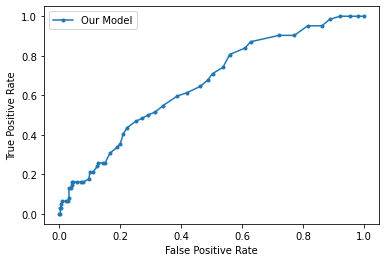

Running ____________________GOMODELS
n_iterations: 1
n_required_iterations: 1
n_possible_iterations: 5
min_resources_: 16
max_resources_: 382
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 1
n_resources: 16
Fitting 4 folds for each of 1 candidates, totalling 4 fits


/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 1 is smaller than n_iter=23. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Threshold=0.220000
[[249  71]
 [ 34  28]]
              precision    recall  f1-score   support

           0       0.88      0.78      0.83       320
           1       0.28      0.45      0.35        62

    accuracy                           0.73       382
   macro avg       0.58      0.61      0.59       382
weighted avg       0.78      0.73      0.75       382

balanced_accuracy_score  0.6148689516129032
matthews_corrcoef  0.19332707129211488
Sensitivity 0.45161290322580644
Specificity 0.778125
AUC-ROC  0.6297631048387097
AUCPR  0.2820951775517825


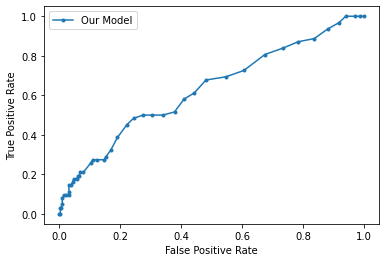

Running ____________________Morgan MODELS
n_iterations: 1
n_required_iterations: 1
n_possible_iterations: 5
min_resources_: 16
max_resources_: 382
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 1
n_resources: 16
Fitting 4 folds for each of 1 candidates, totalling 4 fits


/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 1 is smaller than n_iter=23. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Threshold=0.310000
[[297  23]
 [ 35  27]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       320
           1       0.54      0.44      0.48        62

    accuracy                           0.85       382
   macro avg       0.72      0.68      0.70       382
weighted avg       0.84      0.85      0.84       382

balanced_accuracy_score  0.6818044354838709
matthews_corrcoef  0.3975129303921992
Sensitivity 0.43548387096774194
Specificity 0.928125
AUC-ROC  0.7406502016129032
AUCPR  0.4405525288036393


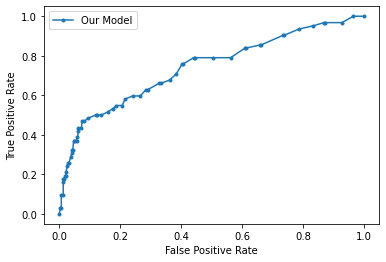

Running ____________________Early Stage Fusion MODELS CP+GO
n_iterations: 1
n_required_iterations: 1
n_possible_iterations: 5
min_resources_: 16
max_resources_: 382
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 1
n_resources: 16
Fitting 4 folds for each of 1 candidates, totalling 4 fits


/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 1 is smaller than n_iter=23. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Threshold=0.220000
[[248  72]
 [ 32  30]]
              precision    recall  f1-score   support

           0       0.89      0.78      0.83       320
           1       0.29      0.48      0.37        62

    accuracy                           0.73       382
   macro avg       0.59      0.63      0.60       382
weighted avg       0.79      0.73      0.75       382

balanced_accuracy_score  0.6294354838709677
matthews_corrcoef  0.21576205984342448
Sensitivity 0.4838709677419355
Specificity 0.775
AUC-ROC  0.6873991935483871
AUCPR  0.323203498929412


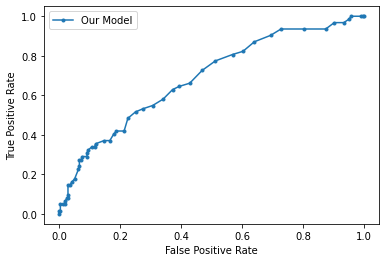

Running ____________________Early Stage Fusion MODELS CP+Morgan
n_iterations: 1
n_required_iterations: 1
n_possible_iterations: 5
min_resources_: 16
max_resources_: 382
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 1
n_resources: 16
Fitting 4 folds for each of 1 candidates, totalling 4 fits


/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 1 is smaller than n_iter=23. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Threshold=0.160000
[[218 102]
 [ 24  38]]
              precision    recall  f1-score   support

           0       0.90      0.68      0.78       320
           1       0.27      0.61      0.38        62

    accuracy                           0.67       382
   macro avg       0.59      0.65      0.58       382
weighted avg       0.80      0.67      0.71       382

balanced_accuracy_score  0.6470766129032258
matthews_corrcoef  0.2250985764517747
Sensitivity 0.6129032258064516
Specificity 0.68125
AUC-ROC  0.705695564516129
AUCPR  0.3513148568296314


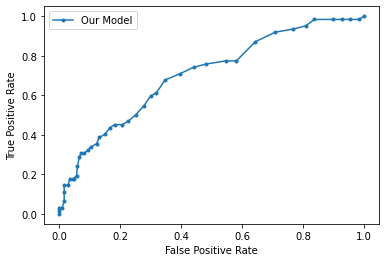

Running ____________________Early Stage Fusion MODELS CP+GO+Morgan
n_iterations: 1
n_required_iterations: 1
n_possible_iterations: 5
min_resources_: 16
max_resources_: 382
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 1
n_resources: 16
Fitting 4 folds for each of 1 candidates, totalling 4 fits


/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 1 is smaller than n_iter=23. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Threshold=0.180000
[[231  89]
 [ 28  34]]
              precision    recall  f1-score   support

           0       0.89      0.72      0.80       320
           1       0.28      0.55      0.37        62

    accuracy                           0.69       382
   macro avg       0.58      0.64      0.58       382
weighted avg       0.79      0.69      0.73       382

balanced_accuracy_score  0.6351310483870968
matthews_corrcoef  0.21328167263197428
Sensitivity 0.5483870967741935
Specificity 0.721875
AUC-ROC  0.7120211693548386
AUCPR  0.3470732850073362


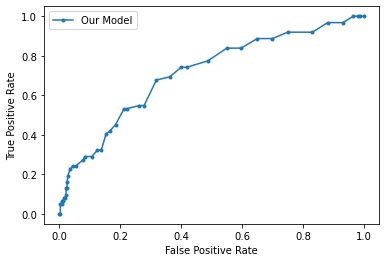

Running ____________________Late Stage Averaged MODELS CP,GO, Morgan
Best Threshold=0.150000
[[189 131]
 [ 13  49]]
              precision    recall  f1-score   support

           0       0.94      0.59      0.72       320
           1       0.27      0.79      0.40        62

    accuracy                           0.62       382
   macro avg       0.60      0.69      0.56       382
weighted avg       0.83      0.62      0.67       382

balanced_accuracy_score  0.6904737903225806
matthews_corrcoef  0.2814000150960251
Sensitivity 0.7903225806451613
Specificity 0.590625
AUC-ROC  0.7580645161290321
AUCPR  0.5007515848667176


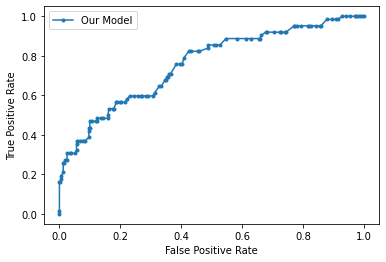

In [32]:
        state=0
        CP_GO_compound_results = pd.DataFrame()
        CP_GO_compound_results['smiles_r'] = df2.smiles_r.to_list() 
        CP_GO_compound_results['StdInChI'] = df2.StdInChI.to_list() 


        list_of_lists=[]
        
        print(X_CP.shape)
        print(X_CP_blind.shape)
        print(collections.Counter(Y))

        inner_cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=state)

        # Create a based model
        rf = RandomForestClassifier(n_jobs=-1)

        # Instantiate the grid search model
        #rsh = GridSearchCV(estimator = rf, param_grid = param_grid, cv = inner_cv, n_jobs=40, verbose = 2)

        # Instantiate the RandomHalving search model
        param_dist_grid = { 
            'random_state': [42],
            'n_jobs': [-1]
            }
        rsh = HalvingRandomSearchCV(estimator=rf, param_distributions=param_dist_grid,
                                factor=2, random_state=state, n_jobs=-1, verbose=2,  cv = inner_cv)

        ##CP MODELS
        print("Running ____________________CP MODELS")

        rsh.fit(X_CP, Y)
        y_prob_CP_cross_val = cross_val_predict(rsh.best_estimator_, X_CP, Y, cv=inner_cv, method='predict_proba')[:, 1]
        # calculate roc curves
        fpr, tpr, thresholds = roc_curve(Y, y_prob_CP_cross_val)
        # get the best threshold
        J = tpr - fpr
        ix = argmax(J)
        best_thresh = thresholds[ix]
        print('Best Threshold=%f' % (best_thresh))


        #best_thresh=0.5    #If using SMOTE


        #CrossVal Results    
        y_pred = [ 1 if x>best_thresh  else 0 for x in y_prob_CP_cross_val ] 
        conf_matrix = confusion_matrix(Y, y_pred)
        print(conf_matrix)
        print(classification_report(Y, y_pred))
        ba= balanced_accuracy_score(Y, y_pred)
        print('balanced_accuracy_score ',ba)
        mcc=matthews_corrcoef(Y, y_pred)
        print('matthews_corrcoef ',mcc)
        # Sensitivity, hit rate, recall, or true positive rate 
        Specificity = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[0,1])
        # Specificity or true negative rate
        Sensitivity = conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1]) 
        print( 'Sensitivity', Sensitivity)
        print( 'Specificity', Specificity)
        AUC = roc_auc_score(Y, y_prob_CP_cross_val)
        print('AUC-ROC ',AUC)   
        AUCPR = average_precision_score(Y, y_prob_CP_cross_val, average='weighted')
        print('AUCPR ',AUCPR) 
        # calculate roc curves
        best_model_fpr, best_model_tpr, _ = roc_curve(Y, y_prob_CP_cross_val)   
        plt.plot(best_model_fpr, best_model_tpr, marker='.', label='Our Model')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend()
        plt.show()


        row=["CrossVal", "CP", Sensitivity, Specificity, ba, mcc, AUC, AUCPR]
        list_of_lists.append(row)



        #HeldOutTest


        classifier = rsh.best_estimator_
        classifier.fit(X_CP, Y)

        y_prob_CP_held_out = classifier.predict_proba(X_CP_blind)[:,1]
        y_pred = [ 1 if x>best_thresh  else 0 for x in y_prob_CP_held_out ]
        row=["Held-Out", "CP", Sensitivity, Specificity, ba, mcc, AUC, AUCPR]
        list_of_lists.append(row)
        
        CP_GO_compound_results["y_proba_CP_Model"]=y_prob_CP_held_out
        CP_GO_compound_results["y_pred_CP_Model"]=y_pred


        ##GO MODELS
        print("Running ____________________GOMODELS")

        rsh.fit(X_GO, Y)
        #rsh.fit(X_res, Y_res) #If using SMOTE

        y_prob_GO_cross_val = cross_val_predict(rsh.best_estimator_, X_GO, Y, cv=inner_cv, method='predict_proba')[:, 1]
        # calculate roc curves
        fpr, tpr, thresholds = roc_curve(Y, y_prob_GO_cross_val)
        # get the best threshold
        J = tpr - fpr
        ix = argmax(J)
        best_thresh = thresholds[ix]
        print('Best Threshold=%f' % (best_thresh))


        #best_thresh=0.5    #If using SMOTE


        #CrossVal Results    
        y_pred = [ 1 if x>best_thresh  else 0 for x in y_prob_GO_cross_val ] 
        conf_matrix = confusion_matrix(Y, y_pred)
        print(conf_matrix)
        print(classification_report(Y, y_pred))
        ba= balanced_accuracy_score(Y, y_pred)
        print('balanced_accuracy_score ',ba)
        mcc=matthews_corrcoef(Y, y_pred)
        print('matthews_corrcoef ',mcc)
        # Sensitivity, hit rate, recall, or true positive rate 
        Specificity = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[0,1])
        # Specificity or true negative rate
        Sensitivity = conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1]) 
        print( 'Sensitivity', Sensitivity)
        print( 'Specificity', Specificity)
        AUC = roc_auc_score(Y, y_prob_GO_cross_val)
        print('AUC-ROC ',AUC)   
        AUCPR = average_precision_score(Y, y_prob_GO_cross_val, average='weighted')
        print('AUCPR ',AUCPR) 
        # calculate roc curves
        best_model_fpr, best_model_tpr, _ = roc_curve(Y, y_prob_GO_cross_val)   
        plt.plot(best_model_fpr, best_model_tpr, marker='.', label='Our Model')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend()
        plt.show()


        row=["CrossVal", "GO", Sensitivity, Specificity, ba, mcc, AUC, AUCPR]
        list_of_lists.append(row)



        #HeldOutTest


        classifier = rsh.best_estimator_
        classifier.fit(X_GO, Y)

        y_prob_GO_held_out = classifier.predict_proba(X_GO_blind)[:,1]
        y_pred = [ 1 if x>best_thresh  else 0 for x in y_prob_GO_held_out ] 
        

        row=["Held-Out", "GO", Sensitivity, Specificity, ba, mcc, AUC, AUCPR]
        list_of_lists.append(row)
        
        CP_GO_compound_results["y_proba_GO_Model"]=y_prob_GO_held_out
        CP_GO_compound_results["y_pred_GO_Model"]=y_pred



        ##Morgan MODELS
        print("Running ____________________Morgan MODELS")
        
        rsh = HalvingRandomSearchCV(estimator=rf, param_distributions=param_dist_grid,
                                factor=2, random_state=state, n_jobs=-1, verbose=2,  cv = inner_cv)
        
        rsh.fit(X_Morgan, Y)

        y_prob_Morgan_cross_val = cross_val_predict(rsh.best_estimator_, X_Morgan, Y, cv=inner_cv, method='predict_proba')[:, 1]
        # calculate roc curves
        fpr, tpr, thresholds = roc_curve(Y, y_prob_Morgan_cross_val)
        # get the best threshold
        J = tpr - fpr
        ix = argmax(J)
        best_thresh = thresholds[ix]
        print('Best Threshold=%f' % (best_thresh))



        #CrossVal Results    
        y_pred = [ 1 if x>best_thresh  else 0 for x in y_prob_Morgan_cross_val ] 
        conf_matrix = confusion_matrix(Y, y_pred)
        print(conf_matrix)
        print(classification_report(Y, y_pred))
        ba= balanced_accuracy_score(Y, y_pred)
        print('balanced_accuracy_score ',ba)
        mcc=matthews_corrcoef(Y, y_pred)
        print('matthews_corrcoef ',mcc)
        # Sensitivity, hit rate, recall, or true positive rate 
        Specificity = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[0,1])
        # Specificity or true negative rate
        Sensitivity = conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1]) 
        print( 'Sensitivity', Sensitivity)
        print( 'Specificity', Specificity)
        AUC = roc_auc_score(Y, y_prob_Morgan_cross_val)
        print('AUC-ROC ',AUC)   
        AUCPR = average_precision_score(Y, y_prob_Morgan_cross_val, average='weighted')
        print('AUCPR ',AUCPR) 
        # calculate roc curves
        best_model_fpr, best_model_tpr, _ = roc_curve(Y, y_prob_Morgan_cross_val)   
        plt.plot(best_model_fpr, best_model_tpr, marker='.', label='Our Model')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend()
        plt.show()


        row=["CrossVal", "Morgan", Sensitivity, Specificity, ba, mcc, AUC, AUCPR]
        list_of_lists.append(row)

        #HeldOutTest


        classifier = rsh.best_estimator_
        classifier.fit(X_Morgan, Y)

        y_prob_Morgan_held_out = classifier.predict_proba(X_Morgan_blind)[:,1]
        y_pred = [ 1 if x>best_thresh  else 0 for x in y_prob_Morgan_held_out ] 
       
        row=["Held-Out", "Morgan", Sensitivity, Specificity, ba, mcc, AUC, AUCPR]
        list_of_lists.append(row)
        
        CP_GO_compound_results["y_proba_Morgan_Model"]=y_prob_Morgan_held_out
        CP_GO_compound_results["y_pred_Morgan_Model"]=y_pred
        

        ##Early Stage Fusion MODELS CP+GO

        X_combined_train = np.concatenate((X_GO, X_CP), axis=1)
        X_combined_test = np.concatenate((X_GO_blind, X_CP_blind), axis=1)

        print("Running ____________________Early Stage Fusion MODELS CP+GO")
        rsh = HalvingRandomSearchCV(estimator=rf, param_distributions=param_dist_grid,
                                factor=2, random_state=state, n_jobs=-1, verbose=2,  cv = inner_cv)
        rsh.fit(X_combined_train, Y)
        #rsh.fit(X_res, Y_res) #If using SMOTE

        y_prob = cross_val_predict(rsh.best_estimator_, X_combined_train, Y, cv=inner_cv, method='predict_proba')[:, 1]
        # calculate roc curves
        fpr, tpr, thresholds = roc_curve(Y, y_prob)
        # get the best threshold
        J = tpr - fpr
        ix = argmax(J)
        best_thresh = thresholds[ix]
        print('Best Threshold=%f' % (best_thresh))


        #best_thresh=0.5    #If using SMOTE


        #CrossVal Results    
        y_pred = [ 1 if x>best_thresh  else 0 for x in y_prob ] 
        conf_matrix = confusion_matrix(Y, y_pred)
        print(conf_matrix)
        print(classification_report(Y, y_pred))
        ba= balanced_accuracy_score(Y, y_pred)
        print('balanced_accuracy_score ',ba)
        mcc=matthews_corrcoef(Y, y_pred)
        print('matthews_corrcoef ',mcc)
        # Sensitivity, hit rate, recall, or true positive rate 
        Specificity = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[0,1])
        # Specificity or true negative rate
        Sensitivity = conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1]) 
        print( 'Sensitivity', Sensitivity)
        print( 'Specificity', Specificity)
        AUC = roc_auc_score(Y, y_prob)
        print('AUC-ROC ',AUC)   
        AUCPR = average_precision_score(Y, y_prob, average='weighted')
        print('AUCPR ',AUCPR) 
        # calculate roc curves
        best_model_fpr, best_model_tpr, _ = roc_curve(Y, y_prob)   
        plt.plot(best_model_fpr, best_model_tpr, marker='.', label='Our Model')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend()
        plt.show()


        row=["CrossVal", "Early Stage Fusion CP+GO", Sensitivity, Specificity, ba, mcc, AUC, AUCPR]
        list_of_lists.append(row)

        #HeldOutTest


        classifier = rsh.best_estimator_
        classifier.fit(X_combined_train, Y)

        y_prob = classifier.predict_proba(X_combined_test)[:,1]
        y_pred = [ 1 if x>best_thresh  else 0 for x in y_prob ] 
        
        row=["Held-Out", "Early Stage Fusion CP+GO", Sensitivity, Specificity, ba, mcc, AUC, AUCPR]
        list_of_lists.append(row)

        CP_GO_compound_results["y_proba_Early_Fusion_CP_GO_Model"]=y_prob
        CP_GO_compound_results["y_pred_Early_Fusion_CP_GO_Model"]=y_pred

        
        
        ##Early Stage Fusion MODELS CP+Morgan

        X_combined_train = np.concatenate((X_Morgan, X_CP), axis=1)
        X_combined_test = np.concatenate((X_Morgan_blind, X_CP_blind), axis=1)

        print("Running ____________________Early Stage Fusion MODELS CP+Morgan")
        rsh = HalvingRandomSearchCV(estimator=rf, param_distributions=param_dist_grid,
                                factor=2, random_state=state, n_jobs=-1, verbose=2,  cv = inner_cv)
        rsh.fit(X_combined_train, Y)
        #rsh.fit(X_res, Y_res) #If using SMOTE

        y_prob = cross_val_predict(rsh.best_estimator_, X_combined_train, Y, cv=inner_cv, method='predict_proba')[:, 1]
        # calculate roc curves
        fpr, tpr, thresholds = roc_curve(Y, y_prob)
        # get the best threshold
        J = tpr - fpr
        ix = argmax(J)
        best_thresh = thresholds[ix]
        print('Best Threshold=%f' % (best_thresh))


        #best_thresh=0.5    #If using SMOTE


        #CrossVal Results    
        y_pred = [ 1 if x>best_thresh  else 0 for x in y_prob ] 
        conf_matrix = confusion_matrix(Y, y_pred)
        print(conf_matrix)
        print(classification_report(Y, y_pred))
        ba= balanced_accuracy_score(Y, y_pred)
        print('balanced_accuracy_score ',ba)
        mcc=matthews_corrcoef(Y, y_pred)
        print('matthews_corrcoef ',mcc)
        # Sensitivity, hit rate, recall, or true positive rate 
        Specificity = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[0,1])
        # Specificity or true negative rate
        Sensitivity = conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1]) 
        print( 'Sensitivity', Sensitivity)
        print( 'Specificity', Specificity)
        AUC = roc_auc_score(Y, y_prob)
        print('AUC-ROC ',AUC)   
        AUCPR = average_precision_score(Y, y_prob, average='weighted')
        print('AUCPR ',AUCPR) 
        # calculate roc curves
        best_model_fpr, best_model_tpr, _ = roc_curve(Y, y_prob)   
        plt.plot(best_model_fpr, best_model_tpr, marker='.', label='Our Model')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend()
        plt.show()


        row=["CrossVal", "Early Stage Fusion CP+Morgan", Sensitivity, Specificity, ba, mcc, AUC, AUCPR]
        list_of_lists.append(row)



        #HeldOutTest


        classifier = rsh.best_estimator_
        classifier.fit(X_combined_train, Y)

        y_prob = classifier.predict_proba(X_combined_test)[:,1]
        y_pred = [ 1 if x>best_thresh  else 0 for x in y_prob ] 

        row=["Held-Out", "Early Stage Fusion CP+Morgan", Sensitivity, Specificity, ba, mcc, AUC, AUCPR]
        list_of_lists.append(row)
        
        CP_GO_compound_results["y_proba_Early_Fusion_Morgan_CP"]=y_prob
        CP_GO_compound_results["y_pred_Early_Fusion_Morgan_CP"]=y_pred
        
        
        
        
        ##Early Stage Fusion MODELS CP+GP+Morgan

        X_combined_train = np.concatenate((X_Morgan, X_CP, X_GO ), axis=1)
        X_combined_test = np.concatenate((X_Morgan_blind, X_CP_blind, X_GO_blind), axis=1)

        print("Running ____________________Early Stage Fusion MODELS CP+GO+Morgan")
        rsh = HalvingRandomSearchCV(estimator=rf, param_distributions=param_dist_grid,
                                factor=2, random_state=state, n_jobs=-1, verbose=2,  cv = inner_cv)
        rsh.fit(X_combined_train, Y)
        #rsh.fit(X_res, Y_res) #If using SMOTE

        y_prob = cross_val_predict(rsh.best_estimator_, X_combined_train, Y, cv=inner_cv, method='predict_proba')[:, 1]
        # calculate roc curves
        fpr, tpr, thresholds = roc_curve(Y, y_prob)
        # get the best threshold
        J = tpr - fpr
        ix = argmax(J)
        best_thresh = thresholds[ix]
        print('Best Threshold=%f' % (best_thresh))


        #best_thresh=0.5    #If using SMOTE


        #CrossVal Results    
        y_pred = [ 1 if x>best_thresh  else 0 for x in y_prob ] 
        conf_matrix = confusion_matrix(Y, y_pred)
        print(conf_matrix)
        print(classification_report(Y, y_pred))
        ba= balanced_accuracy_score(Y, y_pred)
        print('balanced_accuracy_score ',ba)
        mcc=matthews_corrcoef(Y, y_pred)
        print('matthews_corrcoef ',mcc)
        # Sensitivity, hit rate, recall, or true positive rate 
        Specificity = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[0,1])
        # Specificity or true negative rate
        Sensitivity = conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1]) 
        print( 'Sensitivity', Sensitivity)
        print( 'Specificity', Specificity)
        AUC = roc_auc_score(Y, y_prob)
        print('AUC-ROC ',AUC)   
        AUCPR = average_precision_score(Y, y_prob, average='weighted')
        print('AUCPR ',AUCPR) 
        # calculate roc curves
        best_model_fpr, best_model_tpr, _ = roc_curve(Y, y_prob)   
        plt.plot(best_model_fpr, best_model_tpr, marker='.', label='Our Model')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend()
        plt.show()


        row=["CrossVal", "Early Stage Fusion CP+GO+Morgan", Sensitivity, Specificity, ba, mcc, AUC, AUCPR]
        list_of_lists.append(row)



        #HeldOutTest


        classifier = rsh.best_estimator_
        classifier.fit(X_combined_train, Y)

        y_prob = classifier.predict_proba(X_combined_test)[:,1]
        y_pred = [ 1 if x>best_thresh  else 0 for x in y_prob ] 
       

        row=["Held-Out", "Early Stage Fusion CP+GO+Morgan", Sensitivity, Specificity, ba, mcc, AUC, AUCPR]
        list_of_lists.append(row)
        
        CP_GO_compound_results["y_proba_Early_Fusion_CP_GO_Morgan_Model"]=y_prob
        CP_GO_compound_results["y_pred_Early_Fusion_CP_GO_Morgan_Model"]=y_pred
        
        
        
        ##Late Stage MODELS
        print("Running ____________________Late Stage Averaged MODELS CP,GO, Morgan")
        
        y_prob_cross_val = np.mean( np.array([ y_prob_CP_cross_val, y_prob_Morgan_cross_val, y_prob_GO_cross_val ]), axis=0 )
        # calculate roc curves
        fpr, tpr, thresholds = roc_curve(Y, y_prob_cross_val)
        # get the best threshold
        J = tpr - fpr
        ix = argmax(J)
        best_thresh = thresholds[ix]
        print('Best Threshold=%f' % (best_thresh))


        #CrossVal Results    
        y_pred = [ 1 if x>best_thresh  else 0 for x in y_prob_cross_val ] 
        conf_matrix = confusion_matrix(Y, y_pred)
        print(conf_matrix)
        print(classification_report(Y, y_pred))
        ba= balanced_accuracy_score(Y, y_pred)
        print('balanced_accuracy_score ',ba)
        mcc=matthews_corrcoef(Y, y_pred)
        print('matthews_corrcoef ',mcc)
        # Sensitivity, hit rate, recall, or true positive rate 
        Specificity = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[0,1])
        # Specificity or true negative rate
        Sensitivity = conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1]) 
        print( 'Sensitivity', Sensitivity)
        print( 'Specificity', Specificity)
        AUC = roc_auc_score(Y, y_prob_cross_val)
        print('AUC-ROC ',AUC)   
        AUCPR = average_precision_score(Y, y_prob_cross_val, average='weighted')
        print('AUCPR ',AUCPR) 
        # calculate roc curves
        best_model_fpr, best_model_tpr, _ = roc_curve(Y, y_prob_cross_val)   
        plt.plot(best_model_fpr, best_model_tpr, marker='.', label='Our Model')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend()
        plt.show()


        row=["CrossVal", "Late Stage Model Averages", Sensitivity, Specificity, ba, mcc, AUC, AUCPR]
        list_of_lists.append(row)



        #HeldOutTest
        y_prob= np.mean( np.array([ y_prob_CP_held_out, y_prob_Morgan_held_out, y_prob_GO_held_out ]), axis=0 )
        y_pred = [ 1 if x>best_thresh  else 0 for x in y_prob ] 
       
        row=["Held-Out", "Late Stage Model Averages CP+Morgan+GO", Sensitivity, Specificity, ba, mcc, AUC, AUCPR]
        list_of_lists.append(row)

        CP_GO_compound_results["y_proba_Late_Stage_Fusion_CP_GO_Morgan_Model"]=y_prob
        CP_GO_compound_results["y_pred_Late_Stage_Fusion_CP_GO_Morgan_Model"]=y_pred

In [36]:
df_results_alldata = pd.DataFrame(list_of_lists, columns=["Type", "Fingeprint", "Sensitivity", "Specificity", "BA", "MCC", "AUC-ROC", "AUCPR"])
df_results_alldata

,Type,Fingeprint,Sensitivity,Specificity,BA,MCC,AUC-ROC,AUCPR
0,CrossVal,CP,0.741935,0.462500,0.602218,0.152292,0.657157,0.272652
1,Held-Out,CP,0.741935,0.462500,0.602218,0.152292,0.657157,0.272652
2,CrossVal,GO,0.451613,0.778125,0.614869,0.193327,0.629763,0.282095
3,Held-Out,GO,0.451613,0.778125,0.614869,0.193327,0.629763,0.282095
4,CrossVal,Morgan,0.435484,0.928125,0.681804,0.397513,0.740650,0.440553
5,Held-Out,Morgan,0.435484,0.928125,0.681804,0.397513,0.740650,0.440553
6,CrossVal,Early Stage Fusion CP+GO,0.483871,0.775000,0.629435,0.215762,0.687399,0.323203
7,Held-Out,Early Stage Fusion CP+GO,0.483871,0.775000,0.629435,0.215762,0.687399,0.323203
8,CrossVal,Early Stage Fusion CP+Morgan,0.612903,0.681250,0.647077,0.225099,0.705696,0.351315
9,Held-Out,Early Stage Fusion CP+Morgan,0.612903,0.681250,0.647077,0.225099,0.705696,0.351315


In [37]:
CP_GO_compound_results

,smiles_r,StdInChI,y_proba_CP_Model,y_pred_CP_Model,y_proba_GO_Model,y_pred_GO_Model,y_proba_Morgan_Model,y_pred_Morgan_Model,y_proba_Early_Fusion_CP_GO_Model,y_pred_Early_Fusion_CP_GO_Model,y_proba_Early_Fusion_Morgan_CP,y_pred_Early_Fusion_Morgan_CP,y_proba_Early_Fusion_CP_GO_Morgan_Model,y_pred_Early_Fusion_CP_GO_Morgan_Model,y_proba_Late_Stage_Fusion_CP_GO_Morgan_Model,y_pred_Late_Stage_Fusion_CP_GO_Morgan_Model
0,C/C=C/c1ccc2n(c1=O)C[C@H]1[C@@H]2N[C@@H](C(O)=...,InChI=1S/2C19H25N3O3/c2*1-2-4-11-7-8-15-16-13(...,0.25,1,0.18,0,0.17,0,0.15,0,0.14,0,0.13,0,0.200000,1
1,C/C=C/c1ccc2n(c1=O)C[C@H]1[C@H](CO)[C@@H](C(=O...,InChI=1S/2C20H26F3N3O3/c2*1-4-5-12-6-7-15-16-1...,0.20,1,0.09,0,0.25,0,0.11,0,0.17,1,0.11,0,0.180000,1
2,C/C=C/c1ccc2n(c1=O)C[C@H]1[C@@H]2N(CCC(F)(F)F)...,InChI=1S/2C20H26F3N3O3/c2*1-4-5-12-6-7-15-16-1...,0.39,1,0.45,1,0.25,0,0.35,1,0.21,1,0.30,1,0.363333,1
3,C/C=C/c1ccc2n(c1=O)C[C@H]1[C@H](CO)[C@@H](C(=O...,InChI=1S/2C21H21FN2O6S/c2*1-2-5-12-8-9-15-19-1...,0.23,1,0.12,0,0.10,0,0.15,0,0.19,1,0.12,0,0.150000,0
4,C/C=C/c1ccc2n(c1=O)C[C@@H]1[C@@H](CO)[C@H](C(=...,InChI=1S/2C21H21FN2O6S/c2*1-2-5-12-8-9-15-19-1...,0.20,1,0.14,0,0.10,0,0.19,0,0.21,1,0.20,1,0.146667,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9389,NC(=O)c1ccc2[nH]ccc2c1,InChI=1S/C9H8N2O/c10-9(12)7-1-2-8-6(5-7)3-4-11...,0.04,0,0.09,0,0.08,0,0.09,0,0.04,0,0.12,0,0.070000,0
9390,Cc1nc(O)c2cccc(O)c2n1,InChI=1S/C9H8N2O2/c1-5-10-8-6(9(13)11-5)3-2-4-...,0.12,0,0.24,1,0.19,0,0.09,0,0.11,0,0.06,0,0.183333,1
9391,NC(=O)c1sc(-c2ccsc2)cc1N,InChI=1S/C9H8N2OS2/c10-6-3-7(5-1-2-13-4-5)14-8...,0.26,1,0.49,1,0.09,0,0.46,1,0.21,1,0.32,1,0.280000,1
9392,N=C(N)N=C(O)Cc1c(Cl)cccc1Cl,InChI=1S/C9H9Cl2N3O/c10-6-2-1-3-7(11)5(6)4-8(1...,0.08,0,0.07,0,0.14,0,0.07,0,0.06,0,0.10,0,0.096667,0


In [38]:
CP_GO_compound_results.to_csv("Predicitions_for_CP_GO_Space_no_cell_deathv5.csv", index=False)

[CV] END .........................n_jobs=-1, random_state=42; total time=   0.4s
[CV] END .........................n_jobs=-1, random_state=42; total time=   0.4s
[CV] END .........................n_jobs=-1, random_state=42; total time=   0.3s
[CV] END .........................n_jobs=-1, random_state=42; total time=   0.3s
[CV] END .........................n_jobs=-1, random_state=42; total time=   0.3s
[CV] END .........................n_jobs=-1, random_state=42; total time=   0.4s
[CV] END .........................n_jobs=-1, random_state=42; total time=   0.3s
[CV] END .........................n_jobs=-1, random_state=42; total time=   0.3s
[CV] END .........................n_jobs=-1, random_state=42; total time=   0.3s
[CV] END .........................n_jobs=-1, random_state=42; total time=   0.3s
[CV] END .........................n_jobs=-1, random_state=42; total time=   0.4s
[CV] END .........................n_jobs=-1, random_state=42; total time=   0.3s
[CV] END ...................